In [16]:
include("../src/photon_raytrace_mcmc.jl")
using LinearAlgebra
using Statistics
using NPZ
using NLsolve
using SpecialFunctions
using Plots

In [4]:
fileN = npzread("/Users/samuelwitte/Dropbox/Magnetized_Plasma/Miniclusters_Stockholm/Data/MCGDEPCW/MCGDEPCWconversion.npy");

8.4689829637761045e12

In [8]:
NumRuns = 10000
xIn = fileN[1:NumRuns, 3:5];
vIn = fileN[1:NumRuns, 6:8] / c_km;

R_MC = 3.12e9
Mass_NS = 1
M_MC = 1e-10
NS_vel_T = π
NS_vel_M = 200.0 ./ c_km;
NS_vel = [0.0 sin.(NS_vel_T) cos.(NS_vel_T)] .* NS_vel_M;
Roche_R = R_MC .* (2 .* Mass_NS ./ M_MC).^(1.0 ./ 3.0); # km

In [12]:
Init_Erg = 0.5 * (200.0 ./ c_km).^2 - GNew * Mass_NS ./  Roche_R ./ c_km.^2; # init erg / mass
Final_Erg = 0.5 .* sum(vIn.^2, dims=2) .- GNew * Mass_NS ./  sqrt.(sum(xIn.^2, dims=2)) ./ c_km.^2; # init erg / mass
erg_diff = abs.(Init_Erg .- Final_Erg) ./ Init_Erg .* 100.0; # percent diff

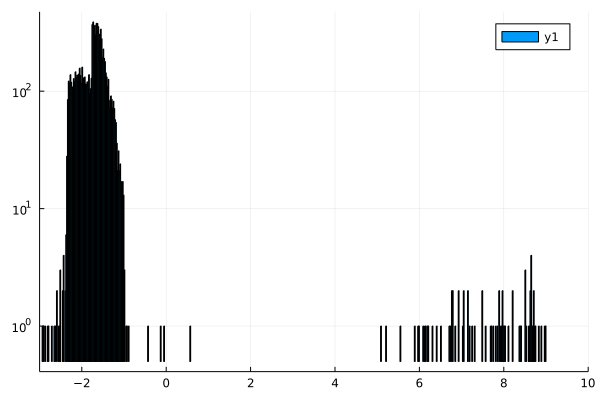

In [29]:
histogram(log10.(erg_diff), bins=1000, yscale=:log10, xlims=(-3, 10))

In [43]:
histogram((erg_diff), bins = 0:.01:100, yscale=:log10, xscale=:log10, xlims=(0.001, 100))

In [48]:
RT = RayTracer; # define ray tracer module
rmag = sqrt.(sum(xIn .^ 2, dims=2));
ϕ = atan.(view(xIn, :, 2), view(xIn, :, 1))
θ = acos.(view(xIn, :, 3)./ rmag)
runs = length(rmag)
vGu = 0.5
errSlve = 1e-20
vel_disp = sqrt.(2 .* GNew .* M_MC ./ R_MC) ./ c_km  # dimensionless
v_perturb = rand(1, 3) .* vel_disp ./ sqrt.(3)
NS_vel_p = NS_vel .+ v_perturb
vel = zeros(runs, 3)
vel2 = zeros(runs, 3)
for i in 1:runs
    velV, accur = RT.solve_vel_CS(θ[i], ϕ[i], rmag[i], NS_vel_p, guess=[vGu vGu vGu], errV=errSlve)
    vel[i, :] = velV
    # velV2, accur2 = RT.solve_vel_CS(θ[i], ϕ[i], rmag[i], NS_vel, guess=[vGu vGu vGu], errV=errSlve)
    # vel2[i, :] = velV2
end


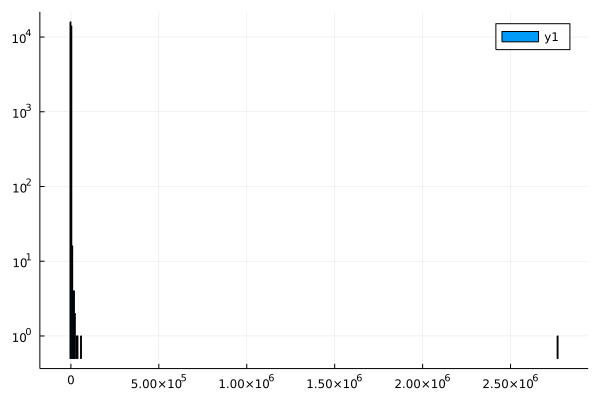

In [51]:
hold = zeros(runs * 3)
indx=1
for i in 1:runs
    velComp = (abs.(vel[i,:] ./ vIn[i,:]) .- 1.0) .* 100
    hold[indx] = velComp[1]
    indx += 1
    hold[indx] = velComp[2]
    indx += 1
    hold[indx] = velComp[3]
    indx += 1
end
histogram(hold, bins=1000, yscale=:log10)


In [54]:
histogram(hold, bins = 0:.1:1000, yscale=:log10, xscale=:log10, xlims=(0.01, 1000))